In [1]:
import pandas as pd
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

In [2]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [3]:
ntrain = train.shape[0]
ntest = test.shape[0]
df = pd.concat((train, test))

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df["Sex"].isnull().sum()

0

In [6]:
gender = {"male":0, "female":1}
df["Sex"] = df["Sex"].map(gender)

In [7]:
df["Embarked"].isnull().sum()

2

In [8]:
df["Embarked"].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [9]:
df.loc[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [10]:
df.sort_values(["Ticket"], ascending=True)[55:70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
54,55,0.0,1,"Ostby, Mr. Engelhart Cornelius",0,65.0,0,1,113509,61.9792,B30,C
351,352,0.0,1,"Williams-Lambert, Mr. Fletcher Fellows",0,NaN,0,0,113510,35.0000,C128,S
252,253,0.0,1,"Stead, Mr. William Thomas",0,62.0,0,0,113514,26.5500,C87,S
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0000,B28,NaN
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0000,B28,NaN
802,803,1.0,1,"Carter, Master. William Thornton II",0,11.0,1,2,113760,120.0000,B96 B98,S
390,391,1.0,1,"Carter, Mr. William Ernest",0,36.0,1,2,113760,120.0000,B96 B98,S
435,436,1.0,1,"Carter, Miss. Lucile Polk",1,14.0,1,2,113760,120.0000,B96 B98,S
763,764,1.0,1,"Carter, Mrs. William Ernest (Lucile Polk)",1,36.0,1,2,113760,120.0000,B96 B98,S
185,186,0.0,1,"Rood, Mr. Hugh Roscoe",0,NaN,0,0,113767,50.0000,A32,S


In [11]:
df.loc[df["Embarked"].isnull(),"Embarked"] = "S"

In [12]:
df["Embarked"].isnull().sum()

0

In [13]:
df_temp1 = df.copy()

In [14]:
gender = {"S": 0, "C":1, "Q":2}
df_temp1["Embarked"] = df_temp1["Embarked"].map(gender)

In [15]:
df_temp1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [16]:
df_temp2 = df.copy()

In [17]:
df_temp2["Embarked"].factorize()

(array([0, 1, 0, ..., 0, 0, 1], dtype=int64),
 Index(['S', 'C', 'Q'], dtype='object'))

In [18]:
df_temp2["Embarked"].factorize()[0]

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [19]:
df_temp2["Embarked"] = df_temp2["Embarked"].factorize()[0]

In [20]:
df_temp2["Embarked"].value_counts()

Embarked
0    916
1    270
2    123
Name: count, dtype: int64

In [21]:
df["Initial"] = df.Name.str.extract(r'([A-Za-z]+)\.')

In [22]:
df["Initial"].value_counts()

Initial
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [23]:
df[(df['Initial'] == 'Mme') | (df["Initial"] == "Mlle") | (df["Initial"] == "Countess") | (df["Initial"] == "Lady") | (df["Initial"] == "Ms")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
369,370,1.0,1,"Aubart, Mme. Leontine Pauline",1,24.0,0,0,PC 17477,69.3000,B35,C,Mme
443,444,1.0,2,"Reynaldo, Ms. Encarnacion",1,28.0,0,0,230434,13.0000,NaN,S,Ms
556,557,1.0,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",1,48.0,1,0,11755,39.6000,A16,C,Lady
641,642,1.0,1,"Sagesser, Mlle. Emma",1,24.0,0,0,PC 17477,69.3000,B35,C,Mlle
710,711,1.0,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",1,24.0,0,0,PC 17482,49.5042,C90,C,Mlle
759,760,1.0,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",1,33.0,0,0,110152,86.5000,B77,S,Countess
88,980,NaN,3,"O'Donoghue, Ms. Bridget",1,NaN,0,0,364856,7.7500,NaN,Q,Ms


In [24]:
df.loc[(df['Initial'] == 'Mme') | (df["Initial"] == "Mlle") | (df["Initial"] == "Countess") | (df["Initial"] == "Lady") | (df["Initial"] == "Ms"), "Initial"] = "Lady"

In [25]:
title_mapping = {'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Lady':4, 'Don':5, 'Rev':6, 'Dr':7,
                 'Major':8, 'Sir':9, 'Col':10, 'Capt':11, 'Jonkheer':12}
df['Initial'] = df["Initial"].map(title_mapping)

In [26]:
df[df["Initial"] == 3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,3.0
16,17,0.0,3,"Rice, Master. Eugene",0,2.0,4,1,382652,29.1250,NaN,Q,3.0
50,51,0.0,3,"Panula, Master. Juha Niilo",0,7.0,4,1,3101295,39.6875,NaN,S,3.0
59,60,0.0,3,"Goodwin, Master. William Frederick",0,11.0,5,2,CA 2144,46.9000,NaN,S,3.0
63,64,0.0,3,"Skoog, Master. Harald",0,4.0,3,2,347088,27.9000,NaN,S,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1252,NaN,3,"Sage, Master. William Henry",0,14.5,8,2,CA. 2343,69.5500,NaN,S,3.0
379,1271,NaN,3,"Asplund, Master. Carl Edgar",0,5.0,4,2,347077,31.3875,NaN,S,3.0
389,1281,NaN,3,"Palsson, Master. Paul Folke",0,6.0,3,1,349909,21.0750,NaN,S,3.0
392,1284,NaN,3,"Abbott, Master. Eugene Joseph",0,13.0,0,2,C.A. 2673,20.2500,NaN,S,3.0


In [27]:
drop_features = ["Name"]

In [28]:
df.drop(drop_features, axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1.0,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1.0,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0.0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0


In [29]:
df["Age"].isnull().sum()

263

In [30]:
title_mapping = {'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Lady':4, 'Don':5, 'Rev':6, 'Dr':7,
                 'Major':8, 'Sir':9, 'Col':10, 'Capt':11, 'Jonkheer':12}
df.groupby("Initial").agg({"Age": ['mean', 'median', 'count']})

Age             
              mean median count
Initial                        
0.0      32.252151   29.0   581
1.0      21.774238   22.0   210
2.0      36.994118   35.5   170
3.0       5.482642    4.0    53
4.0      30.166667   26.0     6
5.0      40.000000   40.0     1
6.0      41.250000   41.5     8
7.0      43.571429   49.0     7
8.0      48.500000   48.5     2
9.0      49.000000   49.0     1
10.0     54.000000   54.5     4
11.0     70.000000   70.0     1
12.0     38.000000   38.0     1

In [31]:
df["Age"].fillna(df.groupby("Initial")["Age"].transform("median"), inplace=True)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1.0,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1.0,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0.0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0


In [33]:
train = df[:ntrain]

In [34]:
import plotly.express as px

fig = px.violin(train, y="Age", color="Survived",
                violinmode="overlay",
                hover_data=train.columns,
                )
fig.show()

In [35]:
df.loc[df["Age"] <= 2, "Age"] = 0
df.loc[(df["Age"] > 2) & (df["Age"] <= 15), "Age"] = 1
df.loc[(df["Age"] > 15) & (df["Age"] <= 20), "Age"] = 2
df.loc[(df["Age"] > 20) & (df["Age"] <= 33), "Age"] = 3
df.loc[(df["Age"] > 33) & (df["Age"] <= 43), "Age"] = 4
df.loc[(df["Age"] > 43) & (df["Age"] <= 60), "Age"] = 5
df.loc[(df["Age"] > 60) & (df["Age"] <= 75), "Age"] = 6
df.loc[df["Age"] > 75, "Age"] = 7

In [36]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,0,3.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1.0,1,1,4.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1.0,3,1,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1.0,1,1,4.0,1,0,113803,53.1000,C123,S,2.0
4,5,0.0,3,0,4.0,0,0,373450,8.0500,NaN,S,0.0


In [37]:
survived = train[train["Survived"] == 1]["Fare"]
dead = train[train["Survived"] == 0]["Fare"]
temp = pd.concat([survived, dead], axis=1, keys=["Survived", "Dead"])

In [38]:
import plotly.graph_objs as go

temp.iplot(kind='histogram', bins=(0, 600, 20), layout=go.Layout(width=1400, height=800))

In [39]:
df["Fare"].isnull().sum()

1

In [40]:
df["Fare"].fillna(df.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [41]:
df.loc[df["Fare"] <= 20, "Fare"] = 0
df.loc[(df["Fare"] >20) & (df["Fare"] <=40), "Fare"] = 1
df.loc[(df["Fare"] >40) & (df["Fare"] <=60), "Fare"] = 2
df.loc[(df["Fare"] >60) & (df["Fare"] <=80), "Fare"] = 3
df.loc[(df["Fare"] >80) & (df["Fare"] <=100), "Fare"] = 4
df.loc[df["Fare"] > 100, "Fare"] = 5


In [42]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,0,3.0,1,0,A/5 21171,0.0,NaN,S,0.0
1,2,1.0,1,1,4.0,1,0,PC 17599,3.0,C85,C,2.0
2,3,1.0,3,1,3.0,0,0,STON/O2. 3101282,0.0,NaN,S,1.0
3,4,1.0,1,1,4.0,1,0,113803,2.0,C123,S,2.0
4,5,0.0,3,0,4.0,0,0,373450,0.0,NaN,S,0.0


In [43]:
df["Family"] = df["SibSp"] + df["Parch"] + 1

In [44]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Family
0,1,0.0,3,0,3.0,1,0,A/5 21171,0.0,NaN,S,0.0,2
1,2,1.0,1,1,4.0,1,0,PC 17599,3.0,C85,C,2.0,2
2,3,1.0,3,1,3.0,0,0,STON/O2. 3101282,0.0,NaN,S,1.0,1
3,4,1.0,1,1,4.0,1,0,113803,2.0,C123,S,2.0,2
4,5,0.0,3,0,4.0,0,0,373450,0.0,NaN,S,0.0,1


In [45]:
drop_features = ["SibSp", "Parch"]
df.drop(drop_features, axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family
0,1,0.0,3,0,3.0,A/5 21171,0.0,NaN,S,0.0,2
1,2,1.0,1,1,4.0,PC 17599,3.0,C85,C,2.0,2
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,NaN,S,1.0,1
3,4,1.0,1,1,4.0,113803,2.0,C123,S,2.0,2
4,5,0.0,3,0,4.0,373450,0.0,NaN,S,0.0,1


<Axes: >

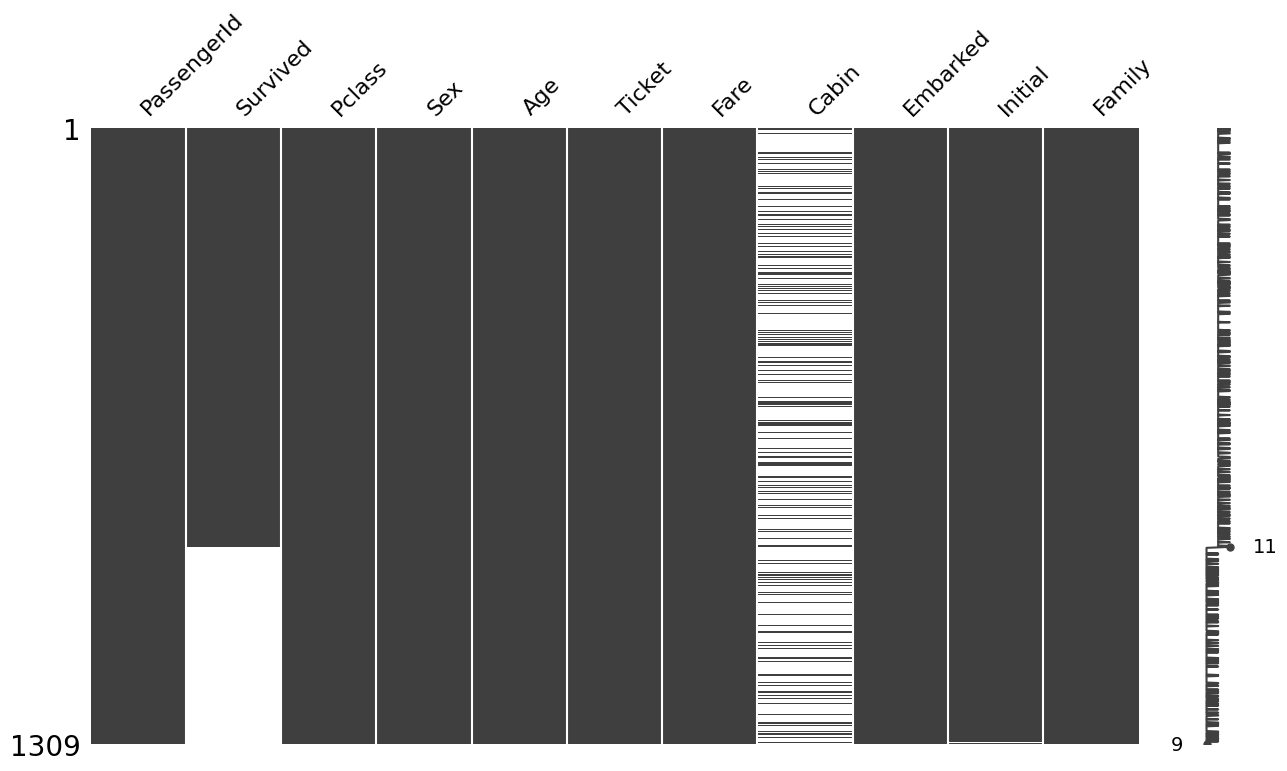

In [46]:
import missingno
missingno.matrix(df, figsize=(15,8))

In [47]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [48]:
df["Cabin"] = df["Cabin"].fillna("U")

In [49]:
df["Cabin"] = df["Cabin"].str[0]

In [50]:
df["Cabin"].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [51]:
df[df["Cabin"] == "U"]["Ticket"]

0               A/5 21171
2        STON/O2. 3101282
4                  373450
5                  330877
7                  349909
              ...        
412                347086
413             A.5. 3236
415    SOTON/O.Q. 3101262
416                359309
417                  2668
Name: Ticket, Length: 1014, dtype: object

In [52]:
train = df[:ntrain]

In [53]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

survived = train[train["Survived"] == 1]["Cabin"]
dead = train[train["Survived"] == 0]["Cabin"]
df_temp1 = pd.concat([survived, dead], axis=1, keys=["Survived", "Dead"])
df_temp1.iplot(kind='histogram')

In [54]:
df["Cabin"] = df["Cabin"].factorize()[0]

In [55]:
df.head(n=10)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,S,0.0,2
1,2,1.0,1,1,4.0,PC 17599,3.0,1,C,2.0,2
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,S,1.0,1
3,4,1.0,1,1,4.0,113803,2.0,1,S,2.0,2
4,5,0.0,3,0,4.0,373450,0.0,0,S,0.0,1
5,6,0.0,3,0,3.0,330877,0.0,0,Q,0.0,1
6,7,0.0,1,0,5.0,17463,2.0,2,S,0.0,1
7,8,0.0,3,0,0.0,349909,1.0,0,S,3.0,5
8,9,1.0,3,1,3.0,347742,0.0,0,S,2.0,3
9,10,1.0,2,1,1.0,237736,1.0,0,C,2.0,2


In [56]:
df["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [57]:
df["Ticket_Initial"] = df["Ticket"].str.extract(r'([^ \t\n\r\f\v]+) ')

In [58]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,S,0.0,2,A/5
1,2,1.0,1,1,4.0,PC 17599,3.0,1,C,2.0,2,PC
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,S,1.0,1,STON/O2.
3,4,1.0,1,1,4.0,113803,2.0,1,S,2.0,2,NaN
4,5,0.0,3,0,4.0,373450,0.0,0,S,0.0,1,NaN


In [59]:
df["Ticket_Num"] = df["Ticket"].str.extract(r'( [^ \t\n\r\f\v]+)')

In [60]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Num
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,S,0.0,2,A/5,21171
1,2,1.0,1,1,4.0,PC 17599,3.0,1,C,2.0,2,PC,17599
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,S,1.0,1,STON/O2.,3101282
3,4,1.0,1,1,4.0,113803,2.0,1,S,2.0,2,NaN,NaN
4,5,0.0,3,0,4.0,373450,0.0,0,S,0.0,1,NaN,NaN


In [61]:
df["Ticket_Num"] = df["Ticket_Num"].fillna(df["Ticket"])

In [62]:
df[df["Ticket_Num"] == "LINE"]

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Num
179,180,0.0,3,0,4.0,LINE,0.0,0,S,0.0,1,NaN,LINE
271,272,1.0,3,0,3.0,LINE,0.0,0,S,0.0,1,NaN,LINE
302,303,0.0,3,0,2.0,LINE,0.0,0,S,0.0,1,NaN,LINE
597,598,0.0,3,0,5.0,LINE,0.0,0,S,0.0,1,NaN,LINE


In [63]:
df.loc[(df["Ticket_Num"] == "LINE"), "Ticket_Initial"] = "LINE"
df.loc[(df["Ticket_Num"] == "LINE"), "Ticket_Num"] = 0

In [64]:
df[df["Ticket_Initial"] == "LINE"]

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Num
179,180,0.0,3,0,4.0,LINE,0.0,0,S,0.0,1,LINE,0
271,272,1.0,3,0,3.0,LINE,0.0,0,S,0.0,1,LINE,0
302,303,0.0,3,0,2.0,LINE,0.0,0,S,0.0,1,LINE,0
597,598,0.0,3,0,5.0,LINE,0.0,0,S,0.0,1,LINE,0


In [65]:
df[df["Ticket_Num"] == " Basle"]

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Num
473,474,1.0,2,1,3.0,SC/AH Basle 541,0.0,4,C,2.0,1,SC/AH,Basle


In [66]:
df.loc[(df["Ticket_Num"] == " Basle"), "Ticket_Num"] = 541

In [67]:
df["Ticket_Initial_Test"] = df["Ticket_Initial"].str.replace(pat=r'[^A-Za-z]', repl='', regex=True)

In [68]:
df["Ticket_Initial2"] = df["Ticket_Initial"].str.replace(pat=r'[^A-Za-z]', repl='', regex=True).str[0:2]

In [72]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Num,Ticket_Initial_Test,Ticket_Initial2
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,S,0.0,2,A/5,21171,A,A
1,2,1.0,1,1,4.0,PC 17599,3.0,1,C,2.0,2,PC,17599,PC,PC
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,S,1.0,1,STON/O2.,3101282,STONO,ST
3,4,1.0,1,1,4.0,113803,2.0,1,S,2.0,2,NaN,113803,NaN,NaN
4,5,0.0,3,0,4.0,373450,0.0,0,S,0.0,1,NaN,373450,NaN,NaN


In [73]:
train = df[:ntrain]

In [76]:
import chart_studio.plotly as py
import cufflinks  as cf
cf.go_offline(connected=True)

survived = train[train["Survived"] == 1]["Ticket_Initial2"]
dead = train[train["Survived"] == 0]["Ticket_Initial2"]
df_temp1 = pd.concat([survived, dead], axis=1, keys=["Survived", "Dead"])
df_temp1.iplot(kind='histogram')

In [69]:
df["Ticket_Initial2"].isnull().sum()

957

In [70]:
df["Ticket_Initial2"] = df["Ticket_Initial2"].fillna("UN")

In [71]:
train = df[:ntrain]
survived = train[train["Survived"] == 1]["Ticket_Initial2"]
dead = train[train["Survived"] == 0]["Ticket_Initial2"]
df_temp1 = pd.concat([survived, dead], axis=1, keys=["Survived", "Dead"])
df_temp1.iplot(kind='histogram')

In [72]:
df["Ticket_Initial2"] = df["Ticket_Initial2"].factorize()[0]

In [73]:
df["Ticket_Num_Cut"] = df["Ticket_Num"].astype('float')

In [74]:
df["Ticket_Num_Cut"] = pd.qcut(df["Ticket_Num_Cut"], q=10, labels=False)

In [75]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Num,Ticket_Initial_Test,Ticket_Initial2,Ticket_Num_Cut
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,S,0.0,2,A/5,21171,A,0,3
1,2,1.0,1,1,4.0,PC 17599,3.0,1,C,2.0,2,PC,17599,PC,1,3
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,S,1.0,1,STON/O2.,3101282,STONO,2,9
3,4,1.0,1,1,4.0,113803,2.0,1,S,2.0,2,NaN,113803,NaN,3,5
4,5,0.0,3,0,4.0,373450,0.0,0,S,0.0,1,NaN,373450,NaN,3,9


In [76]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)
train = df[:ntrain]
survived = train[train["Survived"] == 1]["Ticket_Num_Cut"]
dead = train[train["Survived"] == 0]["Ticket_Num_Cut"]
df_temp1 = pd.concat([survived, dead], axis=1, keys=["Survived", "Dead"])
df_temp1.iplot(kind="histogram")

In [77]:
drop_features = ["Ticket", "Ticket_Initial_Test","Ticket_Initial", "Ticket_Num"]
df.drop(drop_features, axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial2,Ticket_Num_Cut
0,1,0.0,3,0,3.0,0.0,0,S,0.0,2,0,3
1,2,1.0,1,1,4.0,3.0,1,C,2.0,2,1,3
2,3,1.0,3,1,3.0,0.0,0,S,1.0,1,2,9
3,4,1.0,1,1,4.0,2.0,1,S,2.0,2,3,5
4,5,0.0,3,0,4.0,0.0,0,S,0.0,1,3,9


In [78]:
import pickle

In [79]:
with open('titanic_step1_feature_change.pickle', 'wb') as pickle_filename:
    pickle.dump(df, pickle_filename)